In [10]:
import sys
sys.path.append('..')

In [11]:
from src import *

In [12]:
face_images = get_images_from_folder('synth-faces')
cat_images  = get_images_from_folder('cats')

In [13]:
face_sampler = ImageSampleGenerator(images = face_images, sample_size=16)
cat_sampler  = ImageSampleGenerator(images = cat_images,  sample_size=16)

In [14]:
face_matcher = PatternMatcher(16, face_sampler)
cat_matcher  = PatternMatcher(16, cat_sampler)

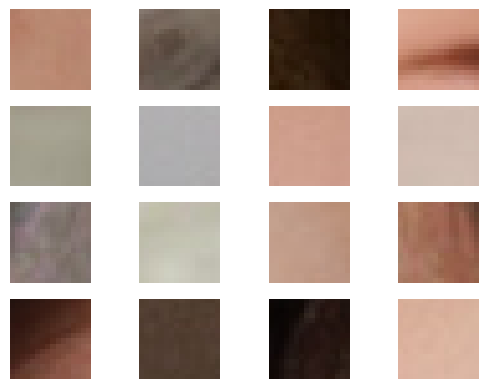

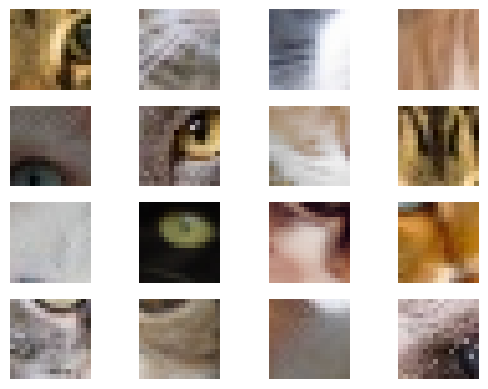

In [15]:
plot_image_grid(face_matcher.patterns)
plot_image_grid(cat_matcher.patterns)

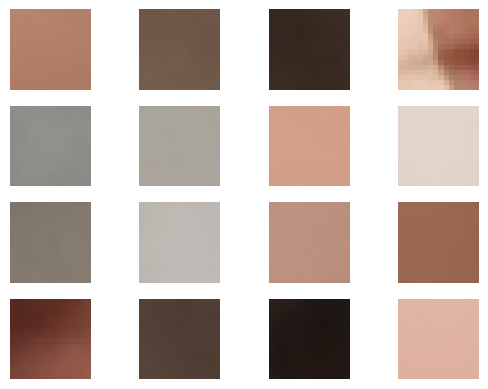

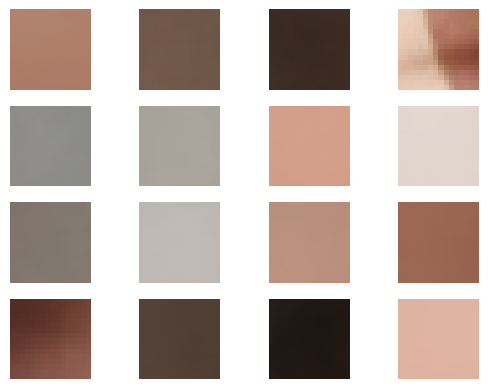

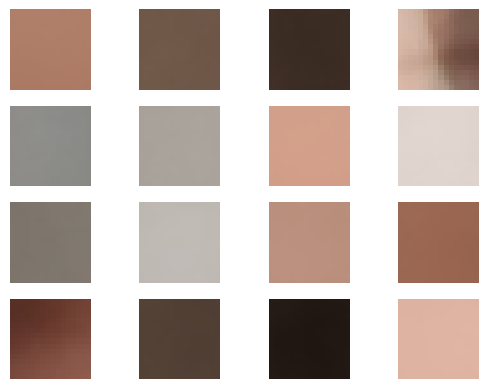

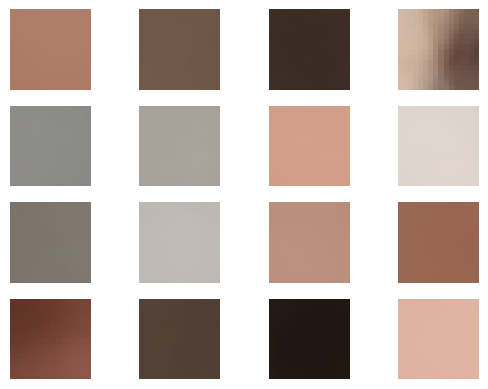

In [16]:
# Train the face matcher

# TODO: swap i / j in all ipynb files
for i in range(4):
    for j in range(1000):
        face_matcher.train_sample()
    plot_image_grid(face_matcher.patterns)

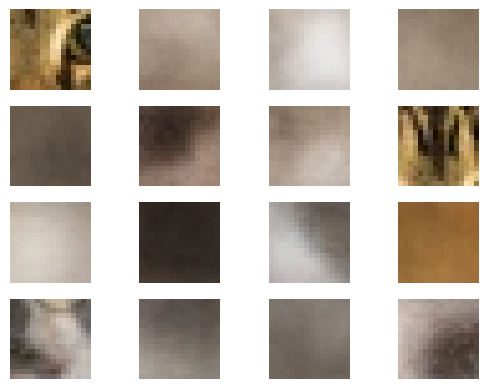

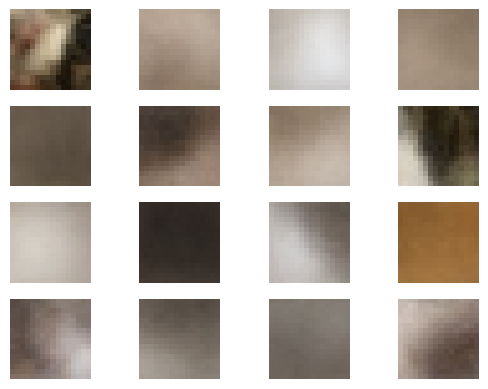

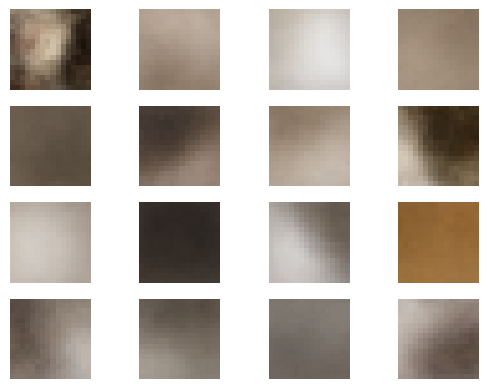

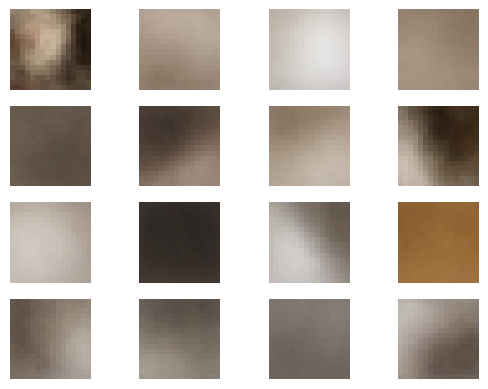

In [17]:
# Train the cat matcher

for i in range(4):
    for j in range(1000):
        cat_matcher.train_sample()
    plot_image_grid(cat_matcher.patterns)

In [18]:
# Test the naive classifier training method above
# Takes a while on account of the size of the synth-faces images
# Perhaps a vanilla difference margin is not appropriate here, to get a good sense of scale.

for i in range(5):
    cat_image  = random.choice(cat_images)

    cat_score  = np.sum(cat_matcher.get_activation_map(cat_image))
    face_score = np.sum(face_matcher.get_activation_map(cat_image))

    print(f'For cat image: cat score = {cat_score}, face score = {face_score}, predicted: {'cat' if cat_score > face_score else 'face'} by a margin of {abs(cat_score - face_score)}, correct: {cat_score > face_score}')

    face_image = random.choice(face_images)

    cat_score  = np.sum(cat_matcher.get_activation_map(face_image))
    face_score = np.sum(face_matcher.get_activation_map(face_image))

    print(f'For face image: cat score = {cat_score}, face score = {face_score}, predicted: {'cat' if cat_score > face_score else 'face'} by a margin of {abs(cat_score - face_score)}, correct: {face_score > cat_score}')

    

For cat image: cat score = 30068.33416891098, face score = 29437.581644564867, predicted: cat by a margin of 630.7525243461132, correct: True
For face image: cat score = 13183642.584676355, face score = 12874661.941162527, predicted: cat by a margin of 308980.6435138285, correct: False
For cat image: cat score = 27141.268302559853, face score = 26310.443332508206, predicted: cat by a margin of 830.8249700516462, correct: True


KeyboardInterrupt: 

In [ ]:
# Here we see all humans are secretly undercover cats.
# Either that or the activation map comparison function is wrong.

In [ ]:
# Test again, this time taking the max of each channel and summing
# This test is larger, takes an estimate of 16 minutes to run with the current activation mapping algorithm

for i in range(20):
    cat_image  = random.choice(cat_images)

    cat_score  = np.sum(np.max(cat_matcher.get_activation_map(cat_image),  axis = -1))
    face_score = np.sum(np.max(face_matcher.get_activation_map(cat_image), axis = -1))

    print(f'For cat image: cat score = {cat_score}, face score = {face_score}, predicted: {'cat' if cat_score > face_score else 'face'} by a margin of {abs(cat_score - face_score)}, correct: {cat_score > face_score}')

    face_image = random.choice(face_images)

    cat_score  = np.sum(np.max(cat_matcher.get_activation_map(face_image),  axis = -1))
    face_score = np.sum(np.max(face_matcher.get_activation_map(face_image), axis = -1))

    print(f'For face image: cat score = {cat_score}, face score = {face_score}, predicted: {'cat' if cat_score > face_score else 'face'} by a margin of {abs(cat_score - face_score)}, correct: {face_score > cat_score}')

    

For cat image: cat score = 661.6767255663872, face score = 653.044727742672, predicted: cat by a margin of 8.63199782371521, correct: True
For face image: cat score = 14948.57774400711, face score = 15304.42199909687, predicted: face by a margin of 355.8442550897598, correct: True
For cat image: cat score = 575.3573717474937, face score = 592.7493688762188, predicted: face by a margin of 17.391997128725052, correct: False
For face image: cat score = 14510.60988676548, face score = 14972.73045951128, predicted: face by a margin of 462.1205727458, correct: True
For cat image: cat score = 668.1754150986671, face score = 670.7547887563705, predicted: face by a margin of 2.5793736577033997, correct: False
For face image: cat score = 14856.733255624771, face score = 15345.32076126337, predicted: face by a margin of 488.5875056385994, correct: True
For cat image: cat score = 650.2823997139931, face score = 657.5169270038605, predicted: face by a margin of 7.234527289867401, correct: False
For